In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
column_names = ['eventId', 'eventCount', 'uuid', 'eventFlag', 'ipAddress', 'timestamp', 'timezone', 'latitude', 'longitude']

In [43]:
df = pd.read_csv('delivery_gps.csv',names=column_names)

In [44]:
df.head()

,eventId,eventCount,uuid,eventFlag,ipAddress,timestamp,timezone,latitude,longitude
0,eventId,eventCount,uuid,eventFlag,ipAddress,timestamp,timezone,latitude,longitude
1,1,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,557056,107.242.121.1,1.69E+12,America/Los_Angeles,41.039148,-122.39544
2,2,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,32768,NaN,1.69E+12,America/Los_Angeles,41.03917,-122.39547
3,3,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,32768,NaN,1.69E+12,America/Los_Angeles,41.03913,-122.39544
4,4,10,bd7b10e3-9199-3ee8-866b-1a08574fed07,557056,107.242.121.1,1.69E+12,America/Los_Angeles,41.039177,-122.39542


In [45]:
df = df.drop(0)

In [46]:
df.head()

,eventId,eventCount,uuid,eventFlag,ipAddress,timestamp,timezone,latitude,longitude
1,1,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,557056,107.242.121.1,1.69E+12,America/Los_Angeles,41.039148,-122.39544
2,2,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,32768,NaN,1.69E+12,America/Los_Angeles,41.03917,-122.39547
3,3,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,32768,NaN,1.69E+12,America/Los_Angeles,41.03913,-122.39544
4,4,10,bd7b10e3-9199-3ee8-866b-1a08574fed07,557056,107.242.121.1,1.69E+12,America/Los_Angeles,41.039177,-122.39542
5,5,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,557056,107.242.121.1,1.69E+12,America/Los_Angeles,41.039182,-122.39544


In [47]:
# Basic statistics
df.describe()

,eventId,eventCount,uuid,eventFlag,ipAddress,timestamp,timezone,latitude,longitude
count,5,5,5,5,3,5,5,5,5
unique,5,2,1,2,2,1,2,5,3
top,1,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,557056,107.242.121.1,1.69E+12,America/Los_Angeles,41.039148,-122.39544
freq,1,4,5,3,2,5,3,1,3


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 1 to 5
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   eventId     5 non-null      object
 1   eventCount  5 non-null      object
 2   uuid        5 non-null      object
 3   eventFlag   5 non-null      object
 4   ipAddress   3 non-null      object
 5   timestamp   5 non-null      object
 6   timezone    5 non-null      object
 7   latitude    5 non-null      object
 8   longitude   5 non-null      object
dtypes: object(9)
memory usage: 492.0+ bytes


all though this data is related to single person i am filling missing rows in the ipAddress column with same values

In [49]:
# Fill missing values in the 'ipAddress' column with the previous valid value
df['ipAddress'].fillna(method='ffill', inplace=True)

In [50]:
df.head()

,eventId,eventCount,uuid,eventFlag,ipAddress,timestamp,timezone,latitude,longitude
1,1,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,557056,107.242.121.1,1.69E+12,America/Los_Angeles,41.039148,-122.39544
2,2,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,32768,107.242.121.1,1.69E+12,America/Los_Angeles,41.03917,-122.39547
3,3,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,32768,107.242.121.1,1.69E+12,America/Los_Angeles,41.03913,-122.39544
4,4,10,bd7b10e3-9199-3ee8-866b-1a08574fed07,557056,107.242.121.1,1.69E+12,America/Los_Angeles,41.039177,-122.39542
5,5,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,557056,107.242.121.1,1.69E+12,America/Los_Angeles,41.039182,-122.39544


In [51]:
!pip install faker

generating synthetic data using libraries like Faker to create more data points for analysis

In [52]:
from faker import Faker
import random

In [53]:
fake = Faker()

In [54]:
synthetic_data = []

In [55]:
for _ in range(100):
    event_id = random.randint(1, 5)
    event_count = random.randint(1, 20)
    uuid = fake.uuid4()
    event_flag = random.randint(1, 1000000)
    ip_address = fake.ipv4()
    timestamp = fake.unix_time()
    timezone = fake.timezone()
    latitude = fake.latitude()
    longitude = fake.longitude()

    synthetic_data.append([event_id, event_count, uuid,
                           event_flag, ip_address, timestamp,
                           timezone, latitude, longitude])

In [56]:
synthetic_df = pd.DataFrame(synthetic_data, columns=df.columns)


In [57]:
# Append synthetic data to the original dataset
df = pd.concat([df, synthetic_df], ignore_index=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   eventId     105 non-null    object
 1   eventCount  105 non-null    object
 2   uuid        105 non-null    object
 3   eventFlag   105 non-null    object
 4   ipAddress   105 non-null    object
 5   timestamp   105 non-null    object
 6   timezone    105 non-null    object
 7   latitude    105 non-null    object
 8   longitude   105 non-null    object
dtypes: object(9)
memory usage: 7.5+ KB


In [59]:
#droping eventId
df.drop('eventId',axis = 1,inplace = True)

In [60]:
df.head()

,eventCount,uuid,eventFlag,ipAddress,timestamp,timezone,latitude,longitude
0,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,557056,107.242.121.1,1.69E+12,America/Los_Angeles,41.039148,-122.39544
1,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,32768,107.242.121.1,1.69E+12,America/Los_Angeles,41.03917,-122.39547
2,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,32768,107.242.121.1,1.69E+12,America/Los_Angeles,41.03913,-122.39544
3,10,bd7b10e3-9199-3ee8-866b-1a08574fed07,557056,107.242.121.1,1.69E+12,America/Los_Angeles,41.039177,-122.39542
4,1,bd7b10e3-9199-3ee8-866b-1a08574fed07,557056,107.242.121.1,1.69E+12,America/Los_Angeles,41.039182,-122.39544


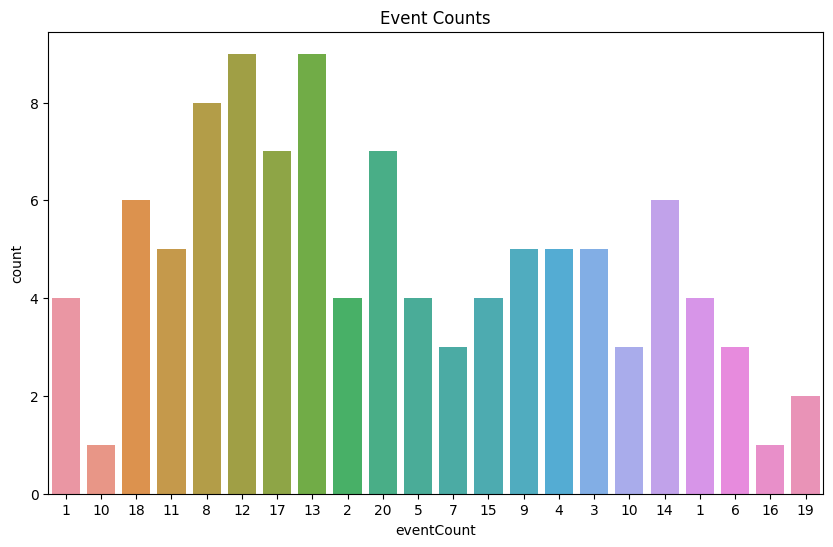

In [61]:
# Visualize event counts
plt.figure(figsize=(10, 6))
sns.countplot(x='eventCount', data=df)
plt.title('Event Counts')
plt.show()

In [62]:
# Group by user and count events
user_event_counts = df.groupby('uuid')['eventCount'].count().reset_index()
user_event_counts.rename(columns={'eventCount': 'Event Count'}, inplace=True)

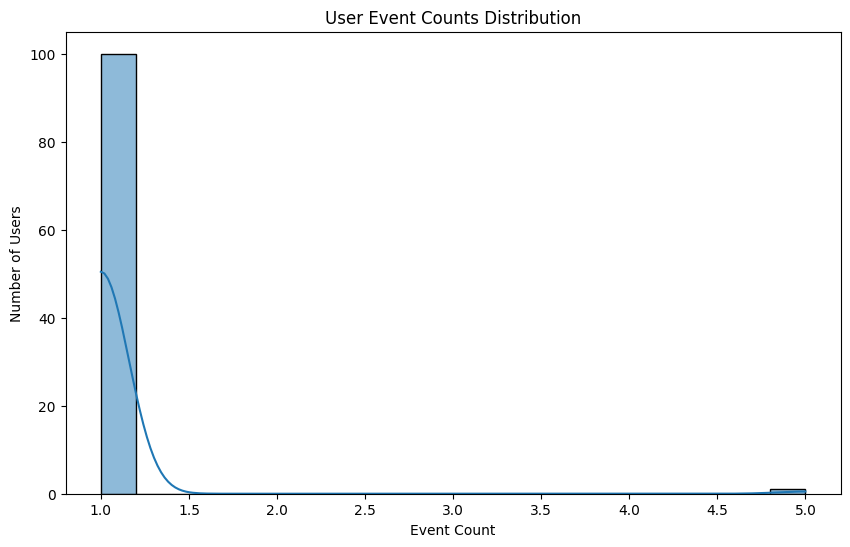

In [63]:
# Visualize user event counts
plt.figure(figsize=(10, 6))
sns.histplot(user_event_counts['Event Count'], bins=20, kde=True)
plt.title('User Event Counts Distribution')
plt.xlabel('Event Count')
plt.ylabel('Number of Users')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


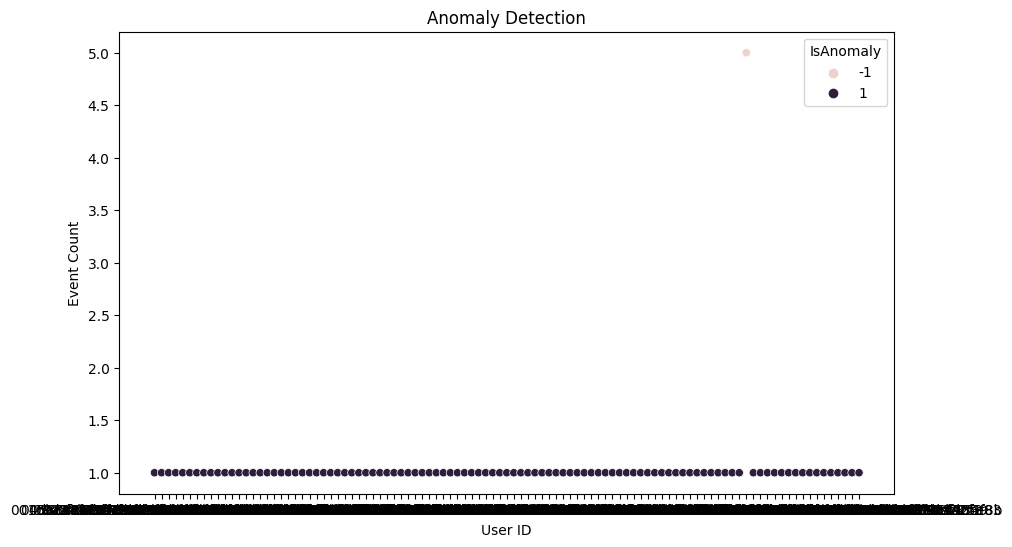

Anomalous Users:
                                     uuid  Event Count  IsAnomaly
84  bd7b10e3-9199-3ee8-866b-1a08574fed07             5         -1


In [64]:
from sklearn.ensemble import IsolationForest

# Fit the isolation forest model
model = IsolationForest(contamination=0.05)  # Adjust the contamination parameter as needed
user_event_counts['IsAnomaly'] = model.fit_predict(user_event_counts[['Event Count']])

# Visualize anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(data=user_event_counts, x='uuid', y='Event Count', hue='IsAnomaly')
plt.title('Anomaly Detection')
plt.xlabel('User ID')
plt.ylabel('Event Count')
plt.show()

# Identify anomalous users
anomalous_users = user_event_counts[user_event_counts['IsAnomaly'] == -1]
print("Anomalous Users:")
print(anomalous_users)


In [70]:
# Convert 'eventCount' column to numeric (if it's not already)
df['eventCount'] = pd.to_numeric(df['eventCount'], errors='coerce')

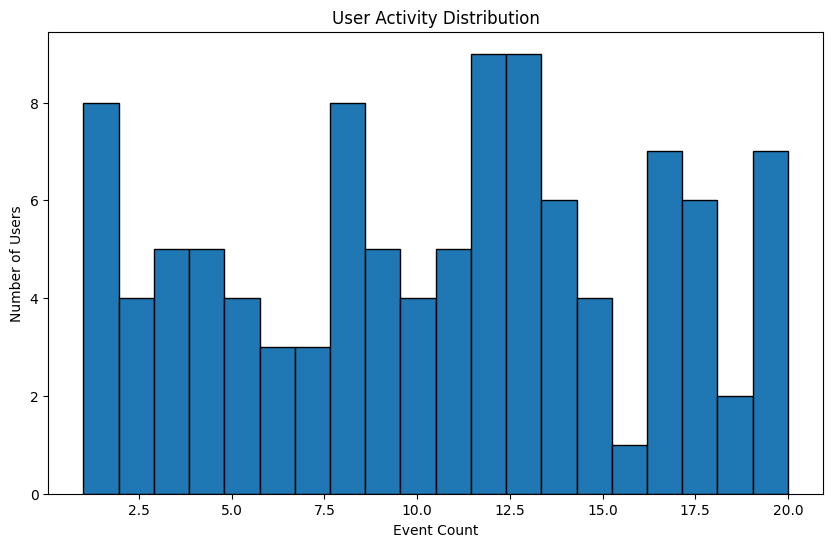

In [71]:
# Plot a histogram to visualize user activity distribution
plt.figure(figsize=(10, 6))
plt.hist(df['eventCount'], bins=20, edgecolor='k')
plt.title('User Activity Distribution')
plt.xlabel('Event Count')
plt.ylabel('Number of Users')
plt.show()

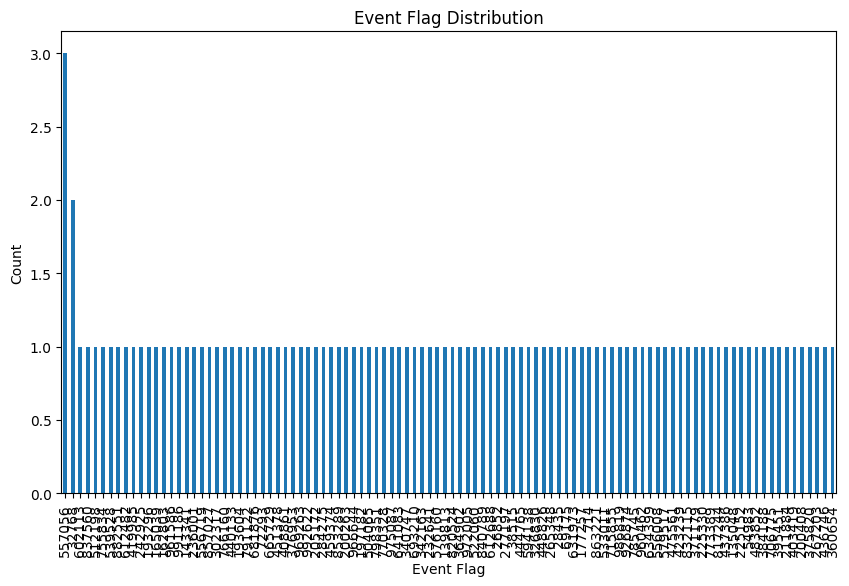

In [66]:
# Analyze the distribution of eventFlag values
event_flag_counts = df['eventFlag'].value_counts()

# Plot a bar chart to visualize the distribution
plt.figure(figsize=(10, 6))
event_flag_counts.plot(kind='bar')
plt.title('Event Flag Distribution')
plt.xlabel('Event Flag')
plt.ylabel('Count')
plt.show()


In [68]:
import folium

In [69]:
# Convert latitude and longitude to float
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)

# Create a map centered at the average latitude and longitude
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=10)

# Add markers for each data point
for _, row in df.iterrows():
    folium.Marker([row['latitude'], row['longitude']]).add_to(m)

# Display the map
m
